# Methylation plots

This is a notebook to create plots for chapter 4 & 5.

1. Create dataframe
2. Create plots and run statistical tests

In [ ]:
%matplotlib inline

In [201]:
import pybedtools
import scipy
import pandas as pd
import numpy as np # need for  stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import mannwhitneyu
import os
import pprint
from scipy.stats import fisher_exact
from scipy.stats import spearmanr
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

In [203]:
#First we need to define the base dirs
DIRS = {}
DIRS['BASE2'] = '/home/anjuni/analysis'
DIRS['FIGURES'] = os.path.join(DIRS['BASE2'], 'figures')

# <span style='color:red'> 1. Make the dataframe <span/>

## Making initial dataframes

In [687]:
# make the dataframes for p and h
h_contig_df = pd.read_csv(os.path.join(DIRS['FIGURES'], 'expression', 'final_rnaseq_methyl_df_h.tsv'),sep='\t')
p_contig_df = pd.read_csv(os.path.join(DIRS['FIGURES'], 'expression', 'final_rnaseq_methyl_df_p.tsv'),sep='\t')

In [688]:
# fix gene types
h_contig_df = h_contig_df.replace(to_replace='Effector', value='Candidate\neffectors')
h_contig_df = h_contig_df.replace(to_replace='BUSCO', value='BUSCOs')
h_contig_df = h_contig_df.replace(to_replace='Other genes', value='Other\ngenes')
h_contig_df = h_contig_df.replace(to_replace='TE gene', value='TE genes')

p_contig_df = p_contig_df.replace(to_replace='Effector', value='Candidate\neffectors')
p_contig_df = p_contig_df.replace(to_replace='BUSCO', value='BUSCOs')
p_contig_df = p_contig_df.replace(to_replace='Other genes', value='Other\ngenes')
p_contig_df = p_contig_df.replace(to_replace='TE gene', value='TE genes')

In [677]:
print(len(p_contig_df))
print(len(h_contig_df))

19348
17199


## This adds a columns at the end of the dataframe for the top 500 genes for each methylation type

- top 500 5mc gene body
- top 500 5mc upstream
- top 500 5mc downstream
- top 500 5mc both
- top 500 6ma tss

In [689]:
###This is the index of all highly methylated genes
#get a true false column for plotting and analysis
h_contig_df["Top_500_5mC_gene_body"] = "Other"
h_contig_df.loc[h_contig_df.sort_values(by='5mC_gene_body', ascending=False).iloc[:500].index,"Top_500_5mC_gene_body"] = "Highly methylated"

h_contig_df["Top_500_5mC_upstream"] = "Other"
h_contig_df.loc[h_contig_df.sort_values(by='5mC_upstream', ascending=False).iloc[:500].index,"Top_500_5mC_upstream"] = "Highly methylated"

h_contig_df["Top_500_5mC_downstream"] = "Other"
h_contig_df.loc[h_contig_df.sort_values(by='5mC_downstream', ascending=False).iloc[:500].index,"Top_500_5mC_downstream"] = "Highly methylated"

h_contig_df["Top_500_5mC_both"] = "Other"
h_contig_df.loc[h_contig_df.sort_values(by='5mC_both', ascending=False).iloc[:500].index,"Top_500_5mC_both"] = "Highly methylated"

h_contig_df["Top_500_6mA_tss"] = "Other"
h_contig_df.loc[h_contig_df.sort_values(by='6mA_tss', ascending=False).iloc[:500].index,"Top_500_6mA_tss"] = "Highly methylated"

# do the same for highly expressed genes
h_contig_df["Top_500_UG"] = "Other"
h_contig_df.loc[h_contig_df.sort_values(by='UG', ascending=False).iloc[:500].index,"Top_500_UG"] = "Highly expressed"

h_contig_df["Low_500_UG"] = "Other"
h_contig_df.loc[h_contig_df.sort_values(by='UG', ascending=True).iloc[:500].index,"Low_500_UG"] = "Lowly expressed"

In [690]:
###This is the index of all highly methylated genes
#get a true false column for plotting and analysis
p_contig_df["Top_500_5mC_gene_body"] = "Other"
p_contig_df.loc[p_contig_df.sort_values(by='5mC_gene_body', ascending=False).iloc[:500].index,"Top_500_5mC_gene_body"] = "Highly methylated"

p_contig_df["Top_500_5mC_upstream"] = "Other"
p_contig_df.loc[p_contig_df.sort_values(by='5mC_upstream', ascending=False).iloc[:500].index,"Top_500_5mC_upstream"] = "Highly methylated"

p_contig_df["Top_500_5mC_downstream"] = "Other"
p_contig_df.loc[p_contig_df.sort_values(by='5mC_downstream', ascending=False).iloc[:500].index,"Top_500_5mC_downstream"] = "Highly methylated"

p_contig_df["Top_500_5mC_both"] = "Other"
p_contig_df.loc[p_contig_df.sort_values(by='5mC_both', ascending=False).iloc[:500].index,"Top_500_5mC_both"] = "Highly methylated"

p_contig_df["Top_500_6mA_tss"] = "Other"
p_contig_df.loc[p_contig_df.sort_values(by='6mA_tss', ascending=False).iloc[:500].index,"Top_500_6mA_tss"] = "Highly methylated"

# do the same for highly expressed genes
p_contig_df["Top_500_UG"] = "Other"
p_contig_df.loc[p_contig_df.sort_values(by='UG', ascending=False).iloc[:500].index,"Top_500_UG"] = "Highly expressed"

p_contig_df["Low_500_UG"] = "Other"
p_contig_df.loc[p_contig_df.sort_values(by='UG', ascending=True).iloc[:500].index,"Low_500_UG"] = "Lowly expressed"

In [691]:
h_contig_df = h_contig_df.replace(to_replace='Highly expressed', value='Highly\nexpressed')
h_contig_df = h_contig_df.replace(to_replace='Lowly expressed', value='Lowly\nexpressed')
h_contig_df = h_contig_df.replace(to_replace='Highly methylated', value='Highly\nmethylated')
h_contig_df = h_contig_df.replace(to_replace='Lowly methylated', value='Lowly\nmethylated')

In [692]:
p_contig_df = p_contig_df.replace(to_replace='Highly expressed', value='Highly\nexpressed')
p_contig_df = p_contig_df.replace(to_replace='Lowly expressed', value='Lowly\nexpressed')
p_contig_df = p_contig_df.replace(to_replace='Highly methylated', value='Highly\nmethylated')
p_contig_df = p_contig_df.replace(to_replace='Lowly methylated', value='Lowly\nmethylated')

In [693]:
#add 0.1 for log transformation
h_contig_df['UG_01'] = h_contig_df['UG'] + 0.1
h_contig_df['HE_01'] = h_contig_df['HE'] + 0.1
h_contig_df['IT6_01'] = h_contig_df['IT6'] + 0.1
h_contig_df['IT9_01'] = h_contig_df['IT9'] + 0.1

p_contig_df['UG_01'] = p_contig_df['UG'] + 0.1
p_contig_df['HE_01'] = p_contig_df['HE'] + 0.1
p_contig_df['IT6_01'] = p_contig_df['IT6'] + 0.1
p_contig_df['IT9_01'] = p_contig_df['IT9'] + 0.1

In [ ]:
#add positive expression column for 6mA

#the 50th percentile was used as a cutoff for both UG expression and 6mA.
#this gave a similar number of genes for both ~8000
#Mondo et al. (2017) found that genes with 6mA were expressed, with no effect on level of expression
#genes with no 6mA had low expression, most of these had no expression

In [265]:
h_contig_df['UG'].quantile([0.1,0.25,0.45,0.5,0.66,0.75])

0.10     0.000000
0.25     0.000000
0.45     0.072161
0.50     0.200211
0.66     5.677116
0.75    15.693674
Name: UG, dtype: float64

In [266]:
h_contig_df['6mA_tss'].quantile([0.1,0.25,0.45,0.5,0.66,0.75])

0.10    0.000
0.25    0.002
0.45    0.004
0.50    0.004
0.66    0.008
0.75    0.012
Name: 6mA_tss, dtype: float64

In [278]:
test_df = h_contig_df[h_contig_df['6mA_tss'] > 0.004]
test_df.shape

(8212, 40)

In [296]:
test_df = h_contig_df[h_contig_df['UG'] > 0.200211]
test_df.shape

(8600, 29)

In [297]:
test_df = h_contig_df[h_contig_df['UG'] < 0.200211]
test_df.shape

(8599, 29)

In [285]:
p_contig_df['UG'].quantile([0.1,0.25,0.45,0.5,0.66,0.75])

0.10     0.000000
0.25     0.000000
0.45     0.063528
0.50     0.169980
0.66     4.989711
0.75    13.754994
Name: UG, dtype: float64

In [286]:
p_contig_df['6mA_tss'].quantile([0.1,0.25,0.45,0.5,0.66,0.75])

0.10    0.000
0.25    0.002
0.45    0.004
0.50    0.004
0.66    0.008
0.75    0.010
Name: 6mA_tss, dtype: float64

In [298]:
test_df = p_contig_df[p_contig_df['6mA_tss'] > 0.004]
print(test_df.shape)
test_df = p_contig_df[p_contig_df['UG'] > 0.169980]
print(test_df.shape)

(8656, 29)
(9674, 29)


In [299]:
test_df = p_contig_df[p_contig_df['6mA_tss'] > 0.004]
print(test_df.shape)
test_df = p_contig_df[p_contig_df['UG'] < 0.169980]
print(test_df.shape)

(8656, 29)
(9674, 29)


In [694]:
# can't see the plot, so log transform
#add 0.1 for log transformation
h_contig_df['5mC_gene_body_01'] = h_contig_df['5mC_gene_body'] + 0.1
h_contig_df['5mC_both_01'] = h_contig_df['5mC_both'] + 0.1
h_contig_df['6mA_tss_01'] = h_contig_df['6mA_tss'] + 0.1

p_contig_df['5mC_gene_body_01'] = p_contig_df['5mC_gene_body'] + 0.1
p_contig_df['5mC_both_01'] = p_contig_df['5mC_both'] + 0.1
p_contig_df['6mA_tss_01'] = p_contig_df['6mA_tss'] + 0.1

In [695]:
# save out these dataframes for later
h_contig_df.to_csv(os.path.join(DIRS['FIGURES'], 'expression', 'new_rnaseq_methyl_df_h.tsv'), index=None, header=True, sep='\t')
p_contig_df.to_csv(os.path.join(DIRS['FIGURES'], 'expression', 'new_rnaseq_methyl_df_p.tsv'), index=None, header=True, sep='\t')

# <span style='color:red'> 2. Make the plots <span/>

## Comparing highly expresssed genes with highly methylated genes

- permutations
- expected value: 500 randomly chosen sites
- observed value: number of overlapping genes between highly methylated and highly expressed

- add columns for the 200 highest and lowest for the existing 500 columns

In [317]:
#permutation function for 5mC
def permutation_5mC(df, col1, tf1, col2, tf2, heading, fn):
    """This function runs permutations on the overlap between the top/bottom 500 methylation and expressed genes, and compares the observed to this distributino to get a p-value and generate a violin plot."""
    # make lists of 500 genes from methylation data and expression data
    methyl_list = h_contig_df.sort_values(by=col1, ascending=tf1).iloc[:500,0]
    exp_list = h_contig_df.sort_values(by=col2, ascending=tf2).iloc[:500,0]
    
    # calculate the overlap between lists
    overlap = len(np.intersect1d(methyl_list, exp_list))
    
    # run permutations 10,000 times to get expected distribution of overlaps
    rand_500_overlap = []
    for x in range(0,10000):
        random_array_0 = np.random.choice(h_contig_df.shape[0], 500, replace=False)
        random_array_1 = np.random.choice(h_contig_df.shape[0], 500, replace=False)
        rand_500_overlap.append(len(np.intersect1d(random_array_0, random_array_1)))
    
    #calculate p value
    count = 0
    for i in rand_500_overlap:
        if i > overlap:
            count += 1
    p = count/10000
    fisher_dict[col1] = overlap, p
    
    #plot it
    f, ax = plt.subplots(figsize=(4, 7))
    plt.style.use('fast')
    sns.violinplot(y=rand_500_overlap, color='c')
    plt.axhline(y=overlap, color='r', linestyle='-')
    plt.title(heading, fontsize=16)
    plt.ylabel('Number of overlapping genes', fontsize=16)
    plt.xlabel('p=' + str(p), fontsize=16)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    outfn = col1 + '_' + fn + '.png'
    plt.savefig(os.path.join(DIRS['FIGURES'], 'expression', outfn), bbox_inches='tight')

In [231]:
def save_fisher_dict(wdict, genome):
    df = pd.DataFrame.from_dict(wdict, orient='index')
    df.rename(columns={0: 'Fisher exact test statistic', 1: 'p-value'}, inplace=True)
    out_fn = os.path.join(DIRS['FIGURES'], 'expression', ('fisher_table_%s.tsv' % genome))
    df.to_csv(out_fn, header=True, sep = '\t')

In [214]:
fisher_dict = {}

# Fisher test on h contig

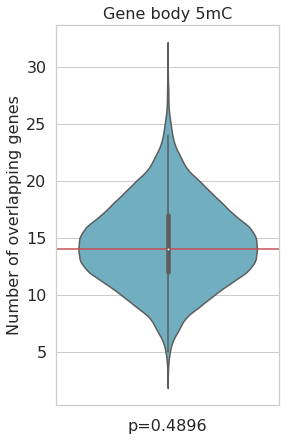

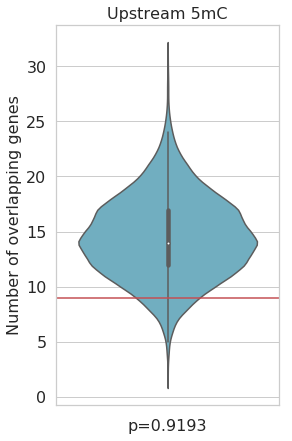

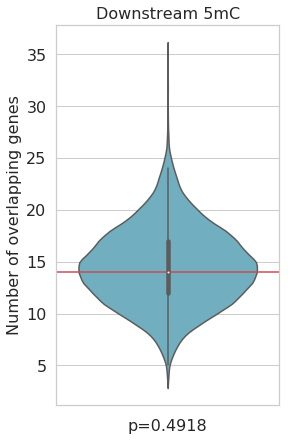

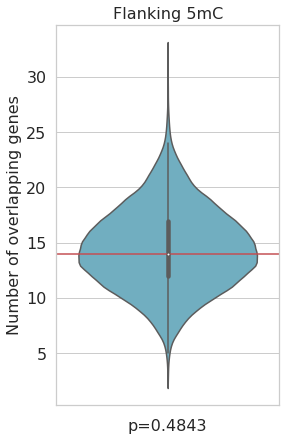

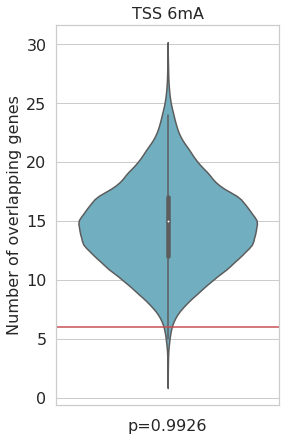

In [235]:
# high expression
fisher_dict = {}
permutation_5mC(h_contig_df, "5mC_gene_body", False, 'UG', False, 'Gene body 5mC', 'high_expression_h')
permutation_5mC(h_contig_df, "5mC_upstream", False, 'UG', False, 'Upstream 5mC', 'high_expression_h')
permutation_5mC(h_contig_df, "5mC_downstream", False, 'UG', False, 'Downstream 5mC', 'high_expression_h')
permutation_5mC(h_contig_df, "5mC_both", False, 'UG', False, 'Flanking 5mC', 'high_expression_h')
permutation_5mC(h_contig_df, "6mA_tss", False, 'UG', False, 'TSS 6mA', 'high_expression_h')
save_fisher_dict(fisher_dict, 'high_expression_h')

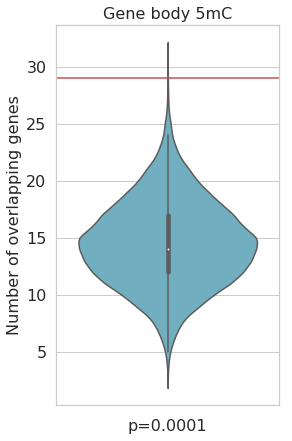

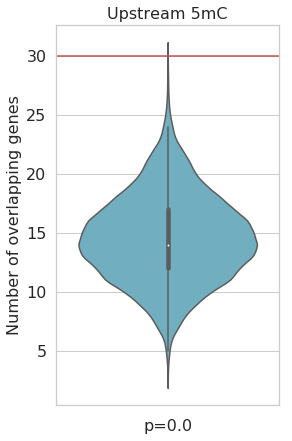

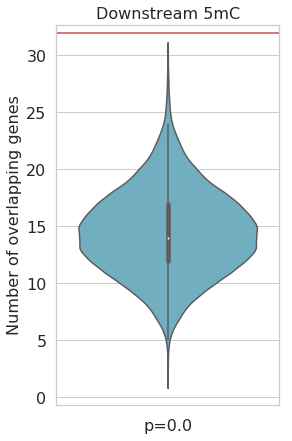

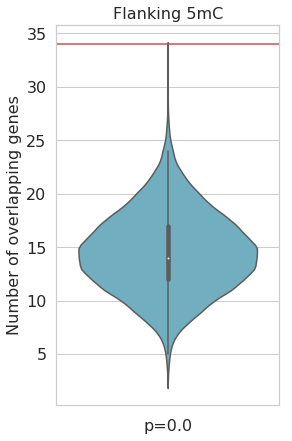

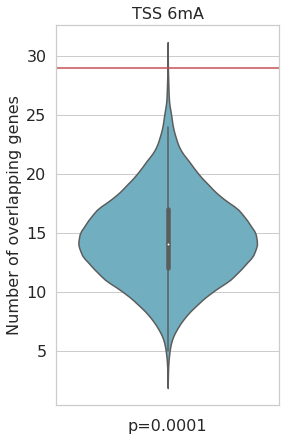

In [241]:
# low expression
fisher_dict  = {}
permutation_5mC(h_contig_df, "5mC_gene_body", False, 'UG', True, 'Gene body 5mC', 'low_expression_h')
permutation_5mC(h_contig_df, "5mC_upstream", False, 'UG', True, 'Upstream 5mC', 'low_expression_h')
permutation_5mC(h_contig_df, "5mC_downstream", False, 'UG', True, 'Downstream 5mC', 'low_expression_h')
permutation_5mC(h_contig_df, "5mC_both", False, 'UG', True, 'Flanking 5mC', 'low_expression_h')
permutation_5mC(h_contig_df, "6mA_tss", False, 'UG', True, 'TSS 6mA', 'low_expression_h')
save_fisher_dict(fisher_dict, 'low_expression_h')

# Fisher test on p contig

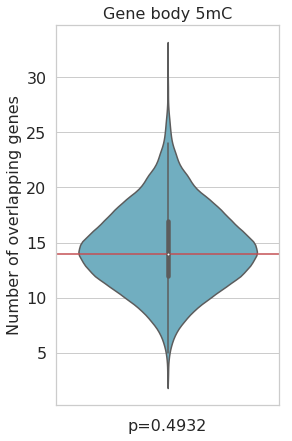

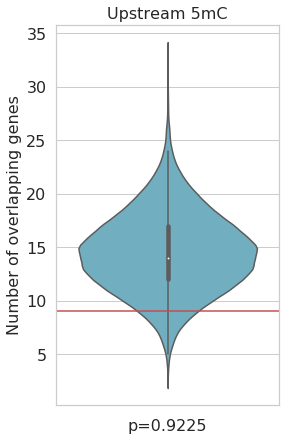

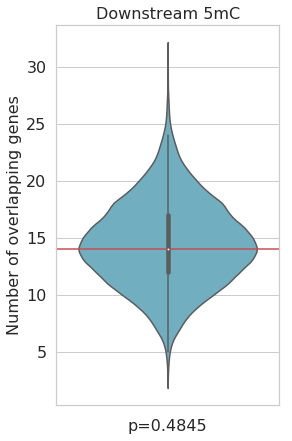

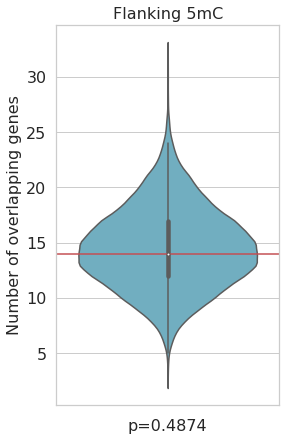

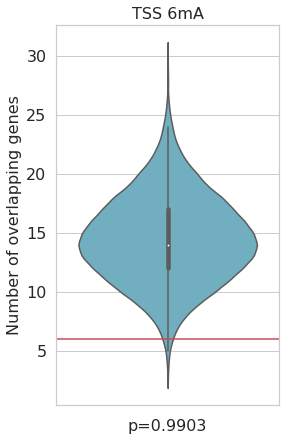

In [243]:
# high expression
fisher_dict = {}
permutation_5mC(p_contig_df, "5mC_gene_body", False, 'UG', False, 'Gene body 5mC', 'high_expression_p')
permutation_5mC(p_contig_df, "5mC_upstream", False, 'UG', False, 'Upstream 5mC', 'high_expression_p')
permutation_5mC(p_contig_df, "5mC_downstream", False, 'UG', False, 'Downstream 5mC', 'high_expression_p')
permutation_5mC(p_contig_df, "5mC_both", False, 'UG', False, 'Flanking 5mC', 'high_expression_p')
permutation_5mC(p_contig_df, "6mA_tss", False, 'UG', False, 'TSS 6mA', 'high_expression_p')
save_fisher_dict(fisher_dict, 'high_expression_p')

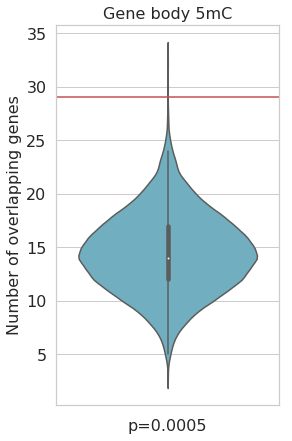

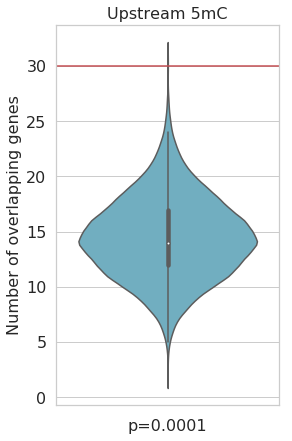

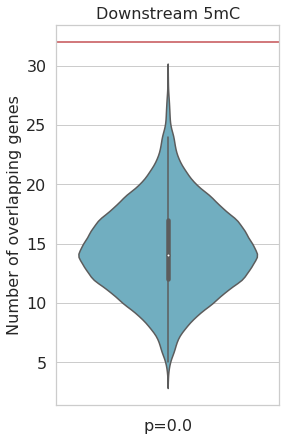

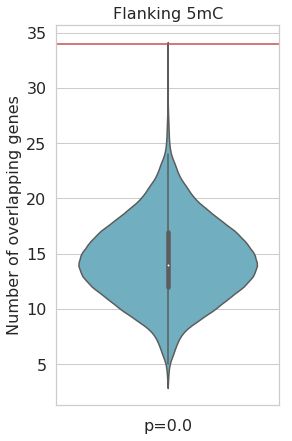

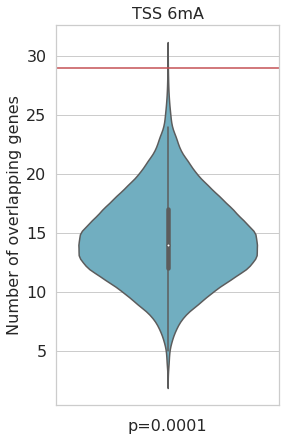

In [245]:
# low expression
fisher_dict = {}
permutation_5mC(p_contig_df, "5mC_gene_body", False, 'UG', True, 'Gene body 5mC', 'low_expression_p')
permutation_5mC(p_contig_df, "5mC_upstream", False, 'UG', True, 'Upstream 5mC', 'low_expression_p')
permutation_5mC(p_contig_df, "5mC_downstream", False, 'UG', True, 'Downstream 5mC', 'low_expression_p')
permutation_5mC(p_contig_df, "5mC_both", False, 'UG', True, 'Flanking 5mC', 'low_expression_p')
permutation_5mC(p_contig_df, "6mA_tss", False, 'UG', True, 'TSS 6mA', 'low_expression_p')
save_fisher_dict(fisher_dict, 'low_expression_p')

## Plots

In [24]:
from seaborn import boxenplot

# <span style='color:red'> Make plots for top 500 methylated genes <span/>

In [46]:
# function to make graph and save out dictionary of mann whitney u
def top500_plot(df, col, mod):
    f, ax = plt.subplots(figsize=(4, 8))
    ax.set_yscale("log")
    sns.boxplot(y='UG_01', x=col, data=df, ax=ax)
    plt.ylabel('Gene expression in ungerminated spores (RPKM)', fontsize=16)
    plt.xlabel(mod, fontsize=16)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    outfn = col + '.png'
    outfn = os.path.join(DIRS['FIGURES'], 'expression', outfn)
    #plt.show()
    stat, p = mannwhitneyu(df[df[col] == 'Other']['UG_01'],df[df[col] == 'Highly methylated']['UG_01'] )
    mwu_dict[mod] = stat, p
    return ax
    #plt.savefig(outfn, bbox_inches='tight')

In [473]:
# run mann whitney U for these
# function to make graph and save out dictionary of mann whitney u
def top500_mwu(df, col, mod):
    stat, p = mannwhitneyu(df[df[col] == 'Other']['UG'],df[df[col] == 'Highly\nmethylated']['UG'] )
    mwu_dict[mod] = stat, p

In [223]:
order_1 = ['Highly\nmethylated', 'Other']

In [474]:
top500_mwu(p_contig_df, 'Top_500_5mC_gene_body', 'Gene body 5mC')
top500_mwu(p_contig_df, 'Top_500_5mC_upstream', 'Upstream 5mC')
top500_mwu(p_contig_df, 'Top_500_5mC_downstream', 'Downstream 5mC')
top500_mwu(p_contig_df, 'Top_500_5mC_both', 'Both upstream and downstream 5mC')
top500_mwu(p_contig_df, 'Top_500_6mA_tss', 'TSS 6mA')

In [476]:
# print p_contig
mwu_dict

{'Both upstream and downstream 5mC': (3945417.0, 9.329959195610918e-11),
 'Downstream 5mC': (3964279.0, 2.5629872009684715e-10),
 'Gene body 5mC': (3876605.0, 1.906264233338097e-12),
 'TSS 6mA': (3781498.5, 5.190274197624713e-15),
 'Upstream 5mC': (3974941.0, 4.4895707401749324e-10)}

In [479]:
# print h_contig
mwu_dict

{'Both upstream and downstream 5mC': (3172806.5, 3.213836087680504e-21),
 'Downstream 5mC': (3226053.0, 3.2215494170472786e-19),
 'Gene body 5mC': (3317799.0, 5.078114967941932e-16),
 'TSS 6mA': (3154522.0, 6.240861258704862e-22),
 'Upstream 5mC': (3164498.5, 1.5316926596053925e-21)}

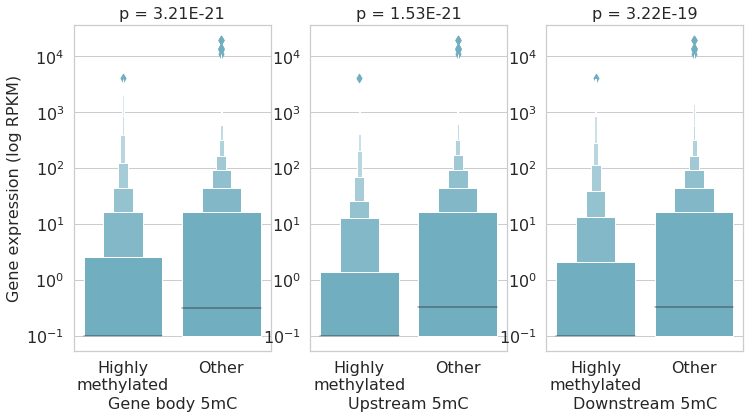

In [481]:
f, ax = plt.subplots(1, 3, figsize=(12,6))
plt.style.use('fast')


sns.boxenplot(y='UG_01', x='Top_500_5mC_gene_body', data=h_contig_df, order=order_1, ax=ax[0], color='c')
ax[0].set_yscale("log")
ax[0].set_ylabel('Gene expression (log RPKM)', fontsize=16)
ax[0].set_xlabel('Gene body 5mC', fontsize=16)
ax[0].set_title('p = 3.21E-21', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

sns.boxenplot(y='UG_01', x='Top_500_5mC_upstream', data=h_contig_df, order=order_1, ax=ax[1], color='c')
ax[1].set_yscale("log")
ax[1].set_xlabel('Upstream 5mC', fontsize=16)
ax[1].set_ylabel(' ', fontsize=16)
ax[1].set_title('p = 1.53E-21', fontsize=16)

sns.boxenplot(y='UG_01', x='Top_500_5mC_downstream', data=h_contig_df, order=order_1, ax=ax[2], color='c')
ax[2].set_yscale("log")
ax[2].set_xlabel('Downstream 5mC', fontsize=16)
ax[2].set_ylabel(' ', fontsize=16)
ax[2].set_title('p = 3.22E-19', fontsize=16)


plt.savefig(os.path.join(DIRS['FIGURES'], 'expression', 'top_500_all_h.png'), bbox_inches='tight')

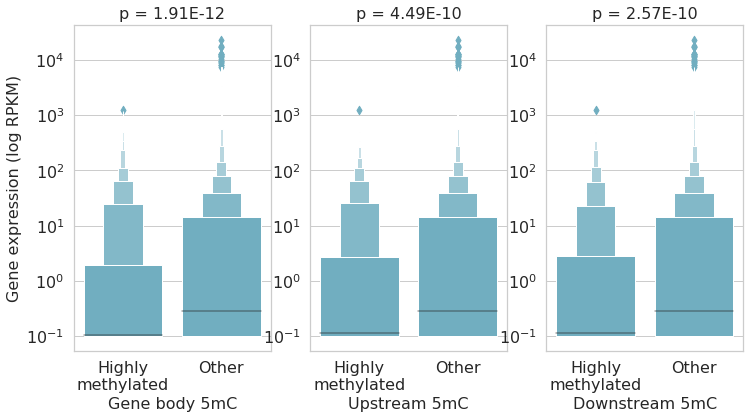

In [482]:
f, ax = plt.subplots(1, 3, figsize=(12,6))
plt.style.use('fast')


sns.boxenplot(y='UG_01', x='Top_500_5mC_gene_body', data=p_contig_df, order=order_1, ax=ax[0], color='c')
ax[0].set_yscale("log")
ax[0].set_ylabel('Gene expression (log RPKM)', fontsize=16)
ax[0].set_xlabel('Gene body 5mC', fontsize=16)
ax[0].set_title('p = 1.91E-12', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

sns.boxenplot(y='UG_01', x='Top_500_5mC_upstream', data=p_contig_df, order=order_1, ax=ax[1], color='c')
ax[1].set_yscale("log")
ax[1].set_xlabel('Upstream 5mC', fontsize=16)
ax[1].set_ylabel(' ', fontsize=16)
ax[1].set_title('p = 4.49E-10', fontsize=16)

sns.boxenplot(y='UG_01', x='Top_500_5mC_downstream', data=p_contig_df, order=order_1, ax=ax[2], color='c')
ax[2].set_yscale("log")
ax[2].set_xlabel('Downstream 5mC', fontsize=16)
ax[2].set_ylabel(' ', fontsize=16)
ax[2].set_title('p = 2.57E-10', fontsize=16)


plt.savefig(os.path.join(DIRS['FIGURES'], 'expression', 'top_500_all_p.png'), bbox_inches='tight')

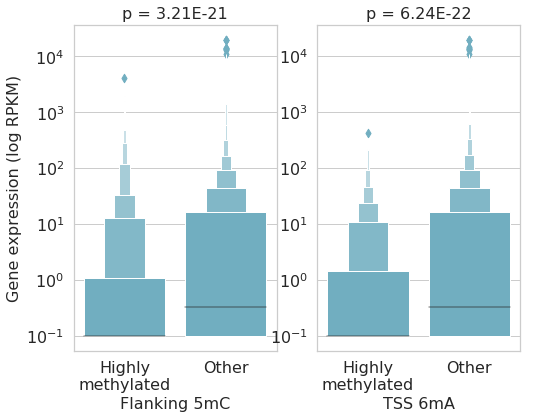

In [483]:
f, ax = plt.subplots(1, 2, figsize=(8,6))
plt.style.use('fast')

sns.boxenplot(y='UG_01', x='Top_500_5mC_both', data=h_contig_df, order=order_1, ax=ax[0], color='c')
ax[0].set_yscale("log")
ax[0].set_xlabel('Flanking 5mC', fontsize=16)
ax[0].set_ylabel('Gene expression (log RPKM)', fontsize=16)
ax[0].set_title('p = 3.21E-21', fontsize=16)

sns.boxenplot(y='UG_01', x='Top_500_6mA_tss', data=h_contig_df, order=order_1, ax=ax[1], color='c')
ax[1].set_yscale("log")
ax[1].set_xlabel('TSS 6mA', fontsize=16)
ax[1].set_ylabel(' ', fontsize=16)
ax[1].set_title('p = 6.24E-22', fontsize=16)

plt.savefig(os.path.join(DIRS['FIGURES'], 'expression', 'top_500_all2_h.png'), bbox_inches='tight')


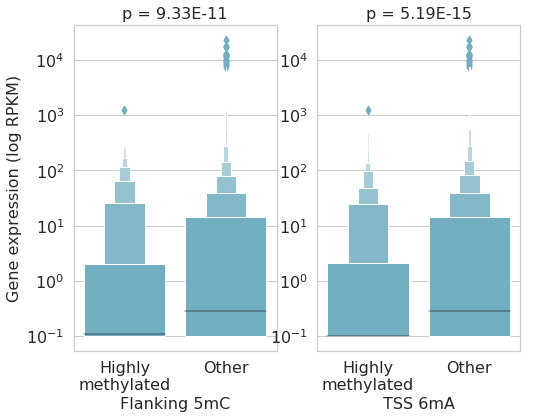

In [484]:
f, ax = plt.subplots(1, 2, figsize=(8,6))
plt.style.use('fast')

sns.boxenplot(y='UG_01', x='Top_500_5mC_both', data=p_contig_df, order=order_1, ax=ax[0], color='c')
ax[0].set_yscale("log")
ax[0].set_xlabel('Flanking 5mC', fontsize=16)
ax[0].set_ylabel('Gene expression (log RPKM)', fontsize=16)
ax[0].set_title('p = 9.33E-11', fontsize=16)

sns.boxenplot(y='UG_01', x='Top_500_6mA_tss', data=p_contig_df, order=order_1, ax=ax[1], color='c')
ax[1].set_yscale("log")
ax[1].set_xlabel('TSS 6mA', fontsize=16)
ax[1].set_ylabel(' ', fontsize=16)
ax[1].set_title('p = 5.19E-15', fontsize=16)

plt.savefig(os.path.join(DIRS['FIGURES'], 'expression', 'top_500_all2_p.png'), bbox_inches='tight')


In [276]:
# run mann whitney U for these
# function to make graph and save out dictionary of mann whitney u
def top500_mwu(df, col, mod):
    stat, p = mannwhitneyu(df[df[col] == 'Other']['UG'],df[df[col] == 'Highly\nmethylated']['UG'] )
    mwu_dict[mod] = stat, p

In [257]:
#save it out
def save_dict_to_tsv(wdict, header, filename):
    df = pd.DataFrame.from_dict(wdict, orient='index')
    df.rename(columns={0: header, 1: 'p-value'}, inplace=True)
    out_fn = os.path.join(DIRS['FIGURES'], 'expression', filename)
    df.to_csv(out_fn, header=True, sep = '\t')

In [ ]:
# run the plots for each type: 5mc up, down, both, gene body
top500_mwu(p_contig_df, 'Top_500_5mC_gene_body', 'Gene body 5mC')
top500_mwu(p_contig_df, 'Top_500_5mC_upstream', 'Upstream 5mC')
top500_mwu(p_contig_df, 'Top_500_5mC_downstream', 'Downstream 5mC')
top500_mwu(p_contig_df, 'Top_500_5mC_both', 'Both upstream and downstream 5mC')
top500_mwu(p_contig_df, 'Top_500_6mA_tss', 'TSS 6mA')

save_dict_to_tsv(mwu_dict, 'Mann Whitney U statistic', 'top500_mwu_table_p.tsv')

In [277]:
# run the plots for each type: 5mc up, down, both, gene body
top500_mwu(h_contig_df, 'Top_500_5mC_gene_body', 'Gene body 5mC')
top500_mwu(h_contig_df, 'Top_500_5mC_upstream', 'Upstream 5mC')
top500_mwu(h_contig_df, 'Top_500_5mC_downstream', 'Downstream 5mC')
top500_mwu(h_contig_df, 'Top_500_5mC_both', 'Both upstream and downstream 5mC')
top500_mwu(h_contig_df, 'Top_500_6mA_tss', 'TSS 6mA')

save_dict_to_tsv(mwu_dict, 'Mann Whitney U statistic', 'top500_mwu_table_h.tsv')

In [278]:
#p contig
mwu_dict

{'Both upstream and downstream 5mC': (3172806.5, 3.213836087680504e-21),
 'Downstream 5mC': (3226053.0, 3.2215494170472786e-19),
 'Gene body 5mC': (3317799.0, 5.078114967941932e-16),
 'TSS 6mA': (3154522.0, 6.240861258704862e-22),
 'Upstream 5mC': (3164498.5, 1.5316926596053925e-21)}

In [284]:
#h contig
mwu_dict

{'Both upstream and downstream 5mC': (3945417.0, 9.329959195610918e-11),
 'Downstream 5mC': (3964279.0, 2.5629872009684715e-10),
 'Gene body 5mC': (3876605.0, 1.906264233338097e-12),
 'TSS 6mA': (3781498.5, 5.190274197624713e-15),
 'Upstream 5mC': (3974941.0, 4.4895707401749324e-10)}

# <span style='color:red'> Make plots for gene types <span/>

In [ ]:
gene_types = ['Other genes', 'Effector', 'BUSCO', 'TE gene']

In [83]:
kwh_dict = {}

In [118]:
print(len(p_contig_df[p_contig_df['Gene_type'] == 'Other genes']))
print(len(p_contig_df[p_contig_df['Gene_type'] == 'Effector']))
print(len(p_contig_df[p_contig_df['Gene_type'] == 'BUSCO']))
print(len(p_contig_df[p_contig_df['Gene_type'] == 'TE gene']))

13415
1069
1444
3420


In [119]:
print(len(h_contig_df[h_contig_df['Gene_type'] == 'Other genes']))
print(len(h_contig_df[h_contig_df['Gene_type'] == 'Effector']))
print(len(h_contig_df[h_contig_df['Gene_type'] == 'BUSCO']))
print(len(h_contig_df[h_contig_df['Gene_type'] == 'TE gene']))

12059
969
1293
2878


### This is to check whether Kruskal_Wallis test was accurate for 6mA_tss data that looked similar in the graph, but had highly significant p-value. Run Mann-Whitney U for each pair.

In [625]:
def multiple(df, col, genome):
    stat, p = mannwhitneyu(df[df['Gene_type'] == 'Other\ngenes'][col], df[df['Gene_type'] == 'Candidate\neffectors'][col])
    multiple_mwu_dict['Other genes, Candidate effectors'] = stat, p
    stat, p = mannwhitneyu(df[df['Gene_type'] == 'Other\ngenes'][col], df[df['Gene_type'] == 'BUSCOs'][col])
    multiple_mwu_dict['Other genes, BUSCOs'] = stat, p
    stat, p = mannwhitneyu(df[df['Gene_type'] == 'Other\ngenes'][col], df[df['Gene_type'] == 'TE genes'][col])
    multiple_mwu_dict['Other genes, TE genes'] = stat, p
    stat, p = mannwhitneyu(df[df['Gene_type'] == 'Candidate\neffectors'][col], df[df['Gene_type'] == 'BUSCOs'][col])
    multiple_mwu_dict['Candidate effectors, BUSCOs'] = stat, p
    stat, p = mannwhitneyu(df[df['Gene_type'] == 'Candidate\neffectors'][col], df[df['Gene_type'] == 'TE genes'][col])
    multiple_mwu_dict['Candidate effectors, TE genes'] = stat, p
    stat, p = mannwhitneyu(df[df['Gene_type'] == 'BUSCOs'][col], df[df['Gene_type'] == 'TE genes'][col])
    multiple_mwu_dict['BUSCOs, TE genes'] = stat, p
    p_list = []
    k_list = []
    p2 = []
    for key, value in multiple_mwu_dict.items():
        k_list.append(key)
        p_list.append(value[1])
    result, p, a, b = multipletests(p_list, alpha=0.05, method='bonferroni')
    for i in p:
        n = ("{0:.2E}".format(i))
        p2.append(n)
    l = ['Gene types compared', 'Corrected p-value (Bonferroni)']
    d = dict(zip(l,[k_list,p2]))
    df = pd.DataFrame.from_dict(d)
    out_fn = os.path.join(DIRS['FIGURES'], 'expression', ('bonferroni_table_%s_%s.tsv' % (col,genome)))
    df.to_csv(out_fn, header=True, index=None, sep = '\t')

In [630]:
multiple(h_contig_df, '6mA_tss', 'h')
multiple(h_contig_df, '5mC_gene_body', 'h')
multiple(h_contig_df, '5mC_upstream', 'h')
multiple(h_contig_df, '5mC_downstream', 'h')
multiple(h_contig_df, '5mC_both', 'h')
multiple(h_contig_df, 'UG', 'h')
multiple(h_contig_df, 'HE', 'h')
multiple(h_contig_df, 'IT6', 'h')
multiple(h_contig_df, 'IT9', 'h')

In [653]:
multiple(p_contig_df, '6mA_tss', 'p')
multiple(p_contig_df, '5mC_gene_body', 'p')
multiple(p_contig_df, '5mC_upstream', 'p')
multiple(p_contig_df, '5mC_downstream', 'p')
multiple(p_contig_df, '5mC_both', 'p')
multiple(p_contig_df, 'UG', 'p')
multiple(p_contig_df, 'HE', 'p')
multiple(p_contig_df, 'IT6', 'p')
multiple(p_contig_df, 'IT9', 'p')

In [663]:
# write kruskal function
def kwh(df, col):
    stat, p = kruskal(df[df['Gene_type'] == 'Other\ngenes'][col], \
                           df[df['Gene_type'] == 'Candidate\neffectors'][col], \
                           df[df['Gene_type'] == 'BUSCOs'][col], \
                           df[df['Gene_type'] == 'TE genes'][col])
    kwh_dict[col] = stat, p

In [706]:
kwh(h_contig_df, 'UG')
kwh(h_contig_df, 'HE')
kwh(h_contig_df, 'IT6')
kwh(h_contig_df, 'IT9')
kwh(h_contig_df, '5mC_gene_body')
kwh(h_contig_df, '5mC_upstream')
kwh(h_contig_df, '5mC_downstream')
kwh(h_contig_df, '5mC_both')
kwh(h_contig_df, '6mA_tss')

save_dict_to_tsv(kwh_dict, 'Kruskal-Wallis H statistic', 'gene_type_kwh_table_h.tsv')

In [707]:
#h contig
kwh_dict

{'5mC_both': (1148.641344905489, 1.0188517508296984e-248),
 '5mC_downstream': (935.1686384549109, 2.0823753933418167e-202),
 '5mC_gene_body': (1318.0805486761435, 1.7566516822413597e-285),
 '5mC_upstream': (1035.809840552702, 3.067253889729898e-224),
 '6mA_tss': (230.37849253404957, 1.1454602179719414e-49),
 'HE': (3084.582674544173, 0.0),
 'IT6': (3545.720103343584, 0.0),
 'IT9': (3629.480946350351, 0.0),
 'UG': (3240.317145668025, 0.0)}

In [711]:
kwh(p_contig_df, 'UG')
kwh(p_contig_df, 'HE')
kwh(p_contig_df, 'IT6')
kwh(p_contig_df, 'IT9')
kwh(p_contig_df, '5mC_gene_body')
kwh(p_contig_df, '5mC_upstream')
kwh(p_contig_df, '5mC_downstream')
kwh(p_contig_df, '5mC_both')
kwh(p_contig_df, '6mA_tss')

save_dict_to_tsv(kwh_dict, 'Kruskal-Wallis H statistic', 'gene_type_kwh_table_p.tsv')

In [712]:
#p contig
kwh_dict

{'5mC_both': (1741.4032446119213, 0.0),
 '5mC_downstream': (1384.7778673808173, 5.919024900887527e-300),
 '5mC_gene_body': (1973.14085949951, 0.0),
 '5mC_upstream': (1584.9264563447066, 0.0),
 '6mA_tss': (383.63609696187956, 7.753672680535324e-83),
 'HE': (3833.6004340623467, 0.0),
 'IT6': (4245.728530775538, 0.0),
 'IT9': (4468.831496727713, 0.0),
 'UG': (3904.6421931306895, 0.0)}

In [ ]:
# run this separately depending on kwh value (0.00 or non-zero)

In [709]:
def genetypelog_plot(df, col, mod, genome):    
    f, ax = plt.subplots(figsize=(6, 5))
    ax.set_yscale("log")
    sns.boxenplot(y=col, x='Gene_type', color='c', order=['Candidate\neffectors', 'BUSCOs', 'TE genes', 'Other\ngenes'], data=df)
    plt.ylabel(mod, fontsize=16)
    plt.xlabel('Gene type', fontsize=16)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    heading = "Kruskal-Wallis, p = " + ("{0:.2E}".format(kwh_dict[col[:-3]][1])) #for non-zero p-value
    #heading = "Kruskal-Wallis, p = " + ("{0:.2f}".format(kwh_dict[col[:-3]][1])) #for p=0.00
    plt.title(heading, fontsize=16)
    outfn = 'gene_types_' + col + genome +'.png'
    outfn = os.path.join(DIRS['FIGURES'], 'expression', outfn)
    plt.savefig(outfn, bbox_inches='tight')  

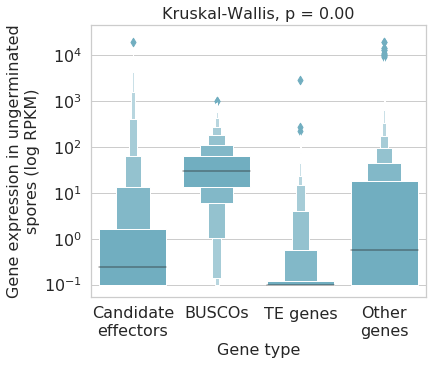

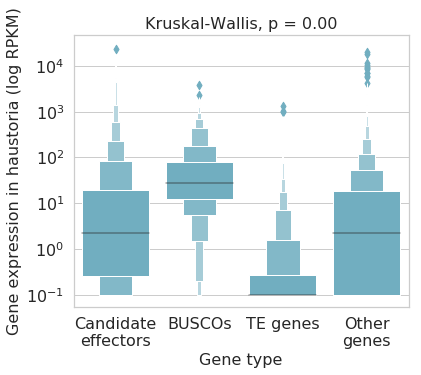

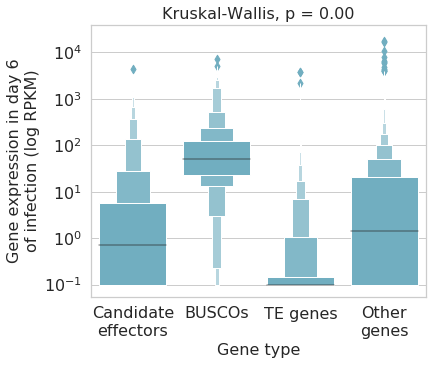

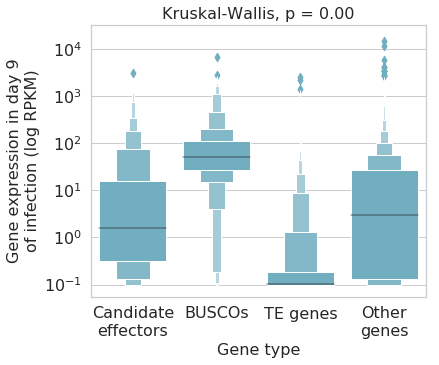

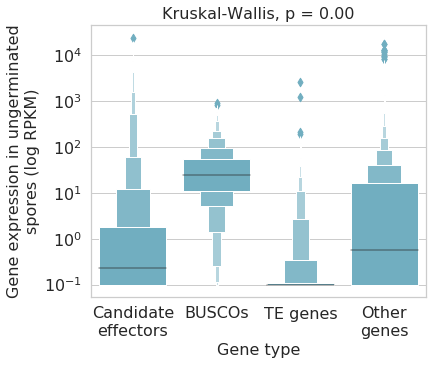

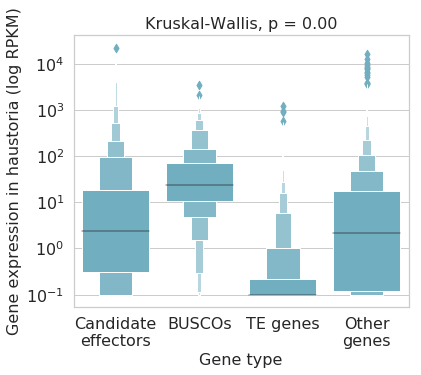

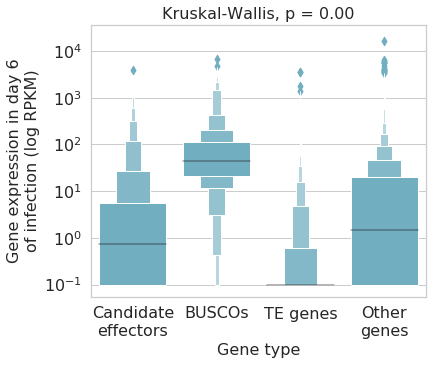

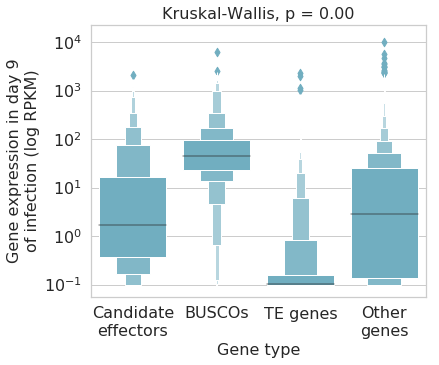

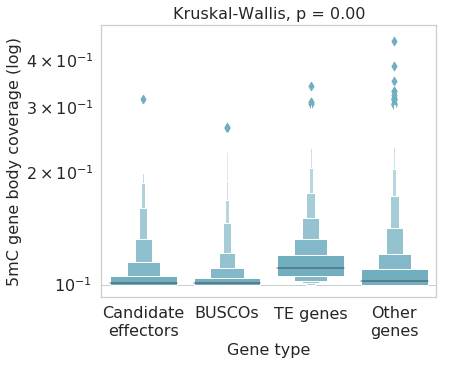

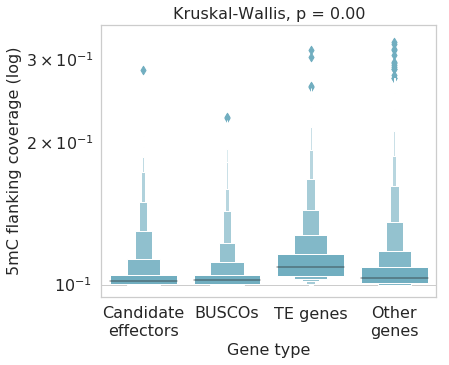

In [705]:
# plot the zeroes

# plot the expression in ungerminated spores
genetypelog_plot(h_contig_df, 'UG_01', 'Gene expression in ungerminated\nspores (log RPKM)', '_h')
genetypelog_plot(h_contig_df, 'HE_01', 'Gene expression in haustoria (log RPKM)', '_h')
genetypelog_plot(h_contig_df, 'IT6_01', 'Gene expression in day 6\nof infection (log RPKM)', '_h')
genetypelog_plot(h_contig_df, 'IT9_01', 'Gene expression in day 9\nof infection (log RPKM)', '_h')

genetypelog_plot(p_contig_df, 'UG_01', 'Gene expression in ungerminated\nspores (log RPKM)', '_p')
genetypelog_plot(p_contig_df, 'HE_01', 'Gene expression in haustoria (log RPKM)', '_p')
genetypelog_plot(p_contig_df, 'IT6_01', 'Gene expression in day 6\nof infection (log RPKM)', '_p')
genetypelog_plot(p_contig_df, 'IT9_01', 'Gene expression in day 9\nof infection (log RPKM)', '_p')

# plot methylated regions
genetypelog_plot(p_contig_df, '5mC_gene_body_01', '5mC gene body coverage (log)', '_p')
genetypelog_plot(p_contig_df, '5mC_both_01', '5mC flanking coverage (log)', '_p')

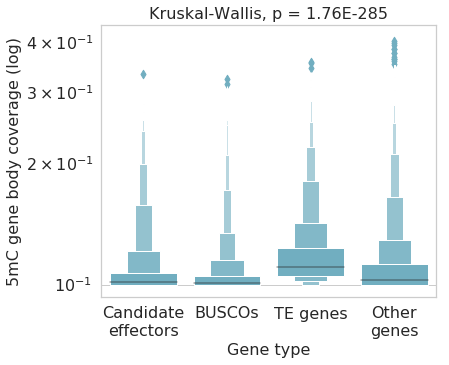

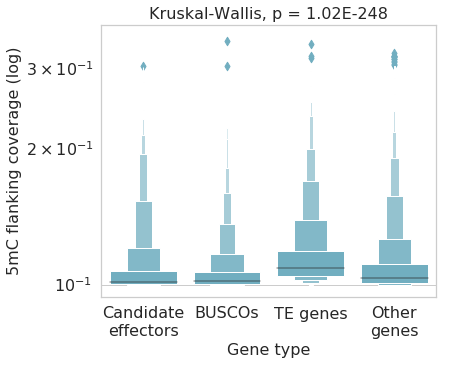

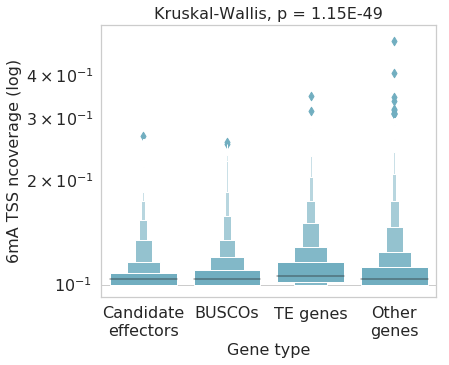

In [710]:
# plot methylated regions
genetypelog_plot(h_contig_df, '5mC_gene_body_01', '5mC gene body coverage (log)', '_h')
genetypelog_plot(h_contig_df, '5mC_both_01', '5mC flanking coverage (log)', '_h')
genetypelog_plot(h_contig_df, '6mA_tss_01', '6mA TSS ncoverage (log)', '_h')

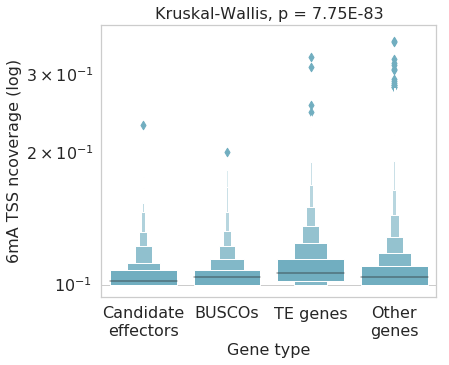

In [713]:
genetypelog_plot(p_contig_df, '6mA_tss_01', '6mA TSS ncoverage (log)', '_p')

In [714]:
te_gene_mwu_dict = {}

In [718]:
#compare TE gene expression in UG spores to haustoria
def te_gene(df, key):
    stat, p = mannwhitneyu(df[df['Gene_type'] == 'TE genes']['UG'], df[df['Gene_type'] == 'TE genes']['HE'])
    te_gene_mwu_dict[key] = stat, p

In [719]:
te_gene(p_contig_df, 'p')
te_gene(h_contig_df, 'h')

In [720]:
te_gene_mwu_dict

{'h': (3552200.5, 1.0193385507962032e-27),
 'p': (5088739.0, 1.5689999147765816e-28)}